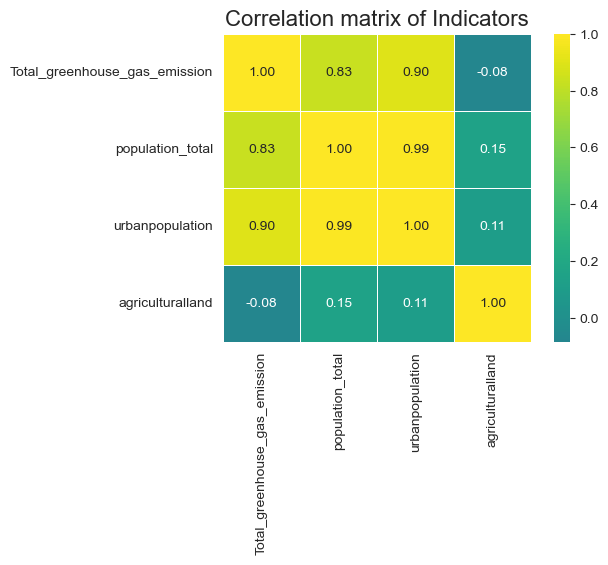

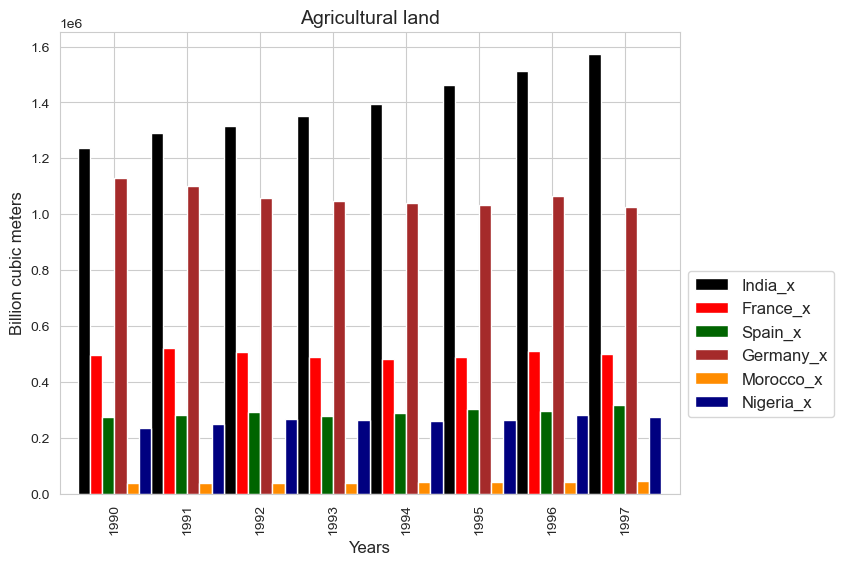

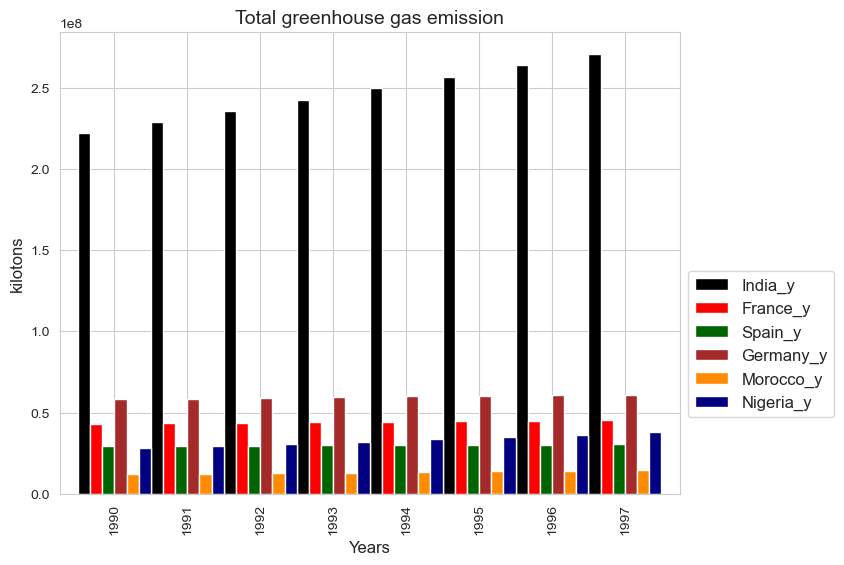

C:\Users\Daniel\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Daniel\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1269: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Daniel\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1277: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Daniel\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1278: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


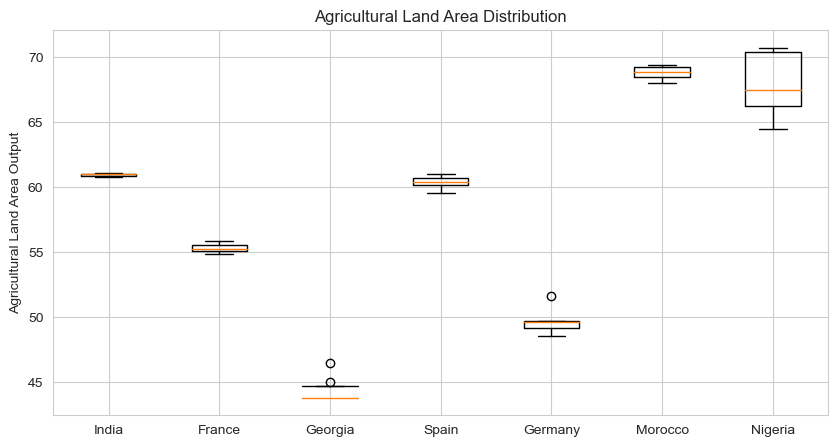

Skew1:
Country Name
Germany   -0.756264
Spain      0.017321
France    -0.500024
Georgia   -1.110919
India      0.016686
Morocco   -0.027028
Nigeria    0.078967
Years           0.0
dtype: object
Kurt1:
Country Name
Germany   -0.660315
Spain     -1.429809
France    -0.437138
Georgia   -0.047774
India     -1.206341
Morocco   -1.177115
Nigeria   -1.202541
Years          -1.2
dtype: object


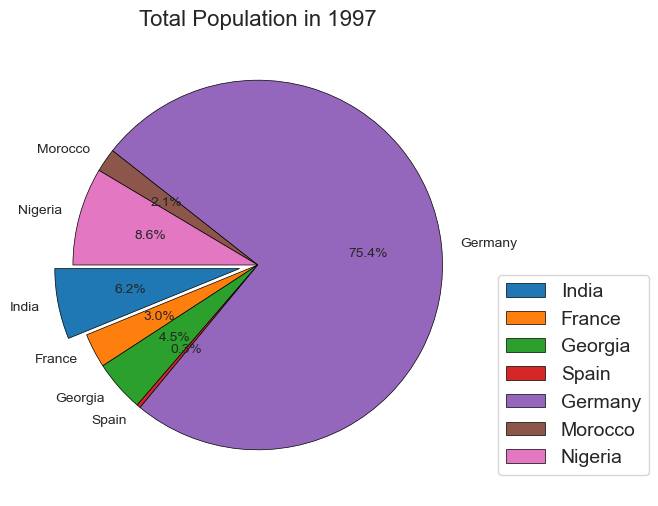

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def read_file(file_name):
    """
    Reading data set using pandas
    imports data from a CSV file into a DataFrame.yields the original and transposed DataFrames after transposing the DataFrame.
    Then transposes the dataframe and returns both the first and transposed dataframes.
    Parameters:
    - file_name (str): The name of the CSV file
    
    Returns:
    - pd.DataFrame: The original DataFrame containing selected countries and years.
    - pd.DataFrame: The transposed DataFrame.
    """
    df = pd.read_csv(file_name, skiprows=4)
    countries = ["India", "France", "Georgia", "Spain", "Germany", "Morocco", "Nigeria"]
    process = df[(df['Country Name'].isin(countries))]
    data = process.drop(['Country Code', 'Indicator Name', 'Indicator Code',
                         '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
                         '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
                         '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
                         '1987', '1988', '1989', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
                         '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
                         '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
                         'Unnamed: 67'], axis=1).reset_index(drop=True)

    df_t = data.transpose()
    df_t.columns = df_t.iloc[0]
    df_t = df_t.iloc[1:]
    df_t.index = pd.to_numeric(df_t.index)
    df_t['Years'] = df_t.index

    # Print or use the modified DataFrame
    return data, df_t

def slice_data(df):
    """
    Slices the DataFrame to include only specific columns ('Country Name', '1997')
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to be sliced
    
    Returns:
    - pd.DataFrame: The merged DataFrame
    """
    df = df[['Country Name', '1997']]
    return df

def merge_four(x1, x2, x3, x4):
    """
    Merges four DataFrames on 'Country Name' using outer join
    
    Parameters:
    - x1, x2, x3, x4 (pd.DataFrame): DataFrames to be merged
    
    Returns:
    - pd.DataFrame: The merged DataFrame
    """
    merge1 = pd.merge(x1, x2, on='Country Name', how='outer')
    merge2 = pd.merge(merge1, x3, on='Country Name', how='outer')
    merge3 = pd.merge(merge2, x4, on='Country Name', how='outer')
    merge4 = merge3.reset_index(drop=True)
    return merge4

def merge_two(x, y):
    """
    Merges two DataFrames on 'Years' using outer join and filters data for specific years
    
    Parameters:
    - x, y (pd.DataFrame): DataFrames to be merged
    
    Returns:
    - DataFrame: Merged DataFrame with specified years and a reset index.
    """
    a_b = pd.merge(x, y, on='Years', how='outer')
    a_b = a_b.reset_index(drop=True)
    a_b_Years = a_b[a_b['Years'].isin([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997])]
    return a_b_Years


def plot_heatmap(df):
    """
    Plots a heatmap of the correlation matrix for numeric columns in the DataFrame
    
    Parameters:
    - df (DataFrame): Input DataFrame
    
    Returns: None
    """
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(6, 4))
    sns.heatmap(numeric_df.corr(), cmap='viridis', square=True, linewidths=.5, annot=True, fmt=".2f", center=0)
    plt.title("Correlation matrix of Indicators", fontsize=16)
    plt.show()

def barPlot(df, x_value, y_value, head_title, x_label, y_label, colors, figsize=(8, 6), fontsize=12):
    """
    Plots a bar chart using Seaborn
    
    Parameters:
    - df (DataFrame): Input DataFrame.
    - x_value (str): Column name for the x-axis.
    - y_value (list): List of column names for the y-axis.
    - head_title (str): Title of the plot.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    - colors (tuple): Tuple of colors for the bars.
    - figsize (tuple): Figure size for the plot.
    - fontsize (int): Font size for titles and labels.
    
    Returns: None
    """
    sns.set_style('whitegrid')

    # Plotting
    ax = df.plot(x=x_value, y=y_value, kind='bar', title=head_title, color=colors, width=1, figsize=figsize, xlabel=x_label, ylabel=y_label)

    # Customize font sizes
    ax.title.set_fontsize(fontsize + 2)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    ax.legend(fontsize=fontsize)
    plt.legend(loc='upper left', bbox_to_anchor=(1, .5), fontsize=fontsize)
    plt.show()

def create_lineplot(df, y_label, title, figsize=(8, 6), fontsize=12):
    """
    Plots a line chart using Seaborn
    
    Parameters:
    - df (DataFrame): Input DataFrame.
    - y_label (str): Label for the y-axis.
    - title (str): Title of the plot.
    - figsize (tuple): Figure size for the plot.
    - fontsize (int): Font size for titles and labels.
    
    Returns: None
    """
def create_boxplot(df, countries, shownotches=True):
    """
    To see how agricultural land is distributed among particular countries, make a boxplot.

    Setting parameters
    - df (pd.DataFrame): The DataFrame with country-specific agricultural land data.
    - countries (list): A list of the names of the nations for whom a boxplot is planned.
    - shownotches (bool, optional): Indicates if the median should have notches displayed. True is the default.
    """
    plt.figure(figsize=(10, 5))
    plt.boxplot([df[country] for country in countries])
    plt.title('Agricultural Land Area Distribution')  # Updated title
    plt.xticks(range(1, len(countries) + 1), countries)
    plt.ylabel('Agricultural Land Area Output')  # Updated ylabel
    plt.show()






def create_pieplot(df, Years, autopct='%1.1f%%', fontsize=12, figsize=(6, 6)):
    """
    Creates and displays a pie chart representing population distribution for a specific year
    
    Parameters:
    - df (DataFrame): Input DataFrame.
    - Years (str): Year for which the pie chart is created.
    - autopct (str): Format string for autopct parameter in the pie chart.
    - fontsize (int): Font size for the title
    - figsize (tuple): Figure size for the plot
    
    Returns: None
    """
    explode = (0.1, 0, 0, 0, 0, 0, 0)  # Adjust the explode values based on your preference
    label = ["India", "France", "Georgia", "Spain", "Germany", "Morocco", "Nigeria"]

    # Replace negative values with zeros
    df[str(Years)] = df[str(Years)].apply(lambda x: max(0, x))
    plt.figure(figsize=figsize)
    plt.pie(df[str(Years)], autopct=autopct, labels=label, explode=explode,
            startangle=180, wedgeprops={"edgecolor": "black", "linewidth": 0.5, "antialiased": True})
    plt.title(f'Total Population in {Years}', fontsize=fontsize + 2)  # Corrected the title formatting
    plt.legend(loc='upper left', bbox_to_anchor=(1, .5), fontsize=fontsize)
    plt.show()

# Function calls
total, total_t = read_file('API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_5995567.csv')
population, population_t = read_file('API_SP.POP.TOTL_DS2_en_csv_v2_6011311.csv')
urban, urban_t = read_file('API_SP.URB.TOTL_DS2_en_csv_v2_5996761.csv')
agri, agri_t = read_file('API_AG.LND.AGRI.ZS_DS2_en_csv_v2_5995314.csv')

total_cor = slice_data(total).rename(columns={'1997': 'Total_greenhouse_gas_emission'})
population_cor = slice_data(population).rename(columns={'1997': 'population_total'})
urban_cor = slice_data(urban).rename(columns={'1997': 'urbanpopulation'})
agri_cor = slice_data(agri).rename(columns={'1997': 'agriculturalland'})

total_population_urban_agri = merge_four(total_cor, population_cor, urban_cor, agri_cor)

total_population_urban_agri.describe()

# plotting heatmap
plot_heatmap(total_population_urban_agri)

agri_total = merge_two(total_t, urban_t)

# Custom colors
custom_colors1 = ('black', 'red', 'darkgreen', 'brown', 'darkorange', 'navy')
custom_colors2 = ('black', 'red', 'darkgreen', 'brown', 'darkorange', 'navy')

# Function calls with custom colors
barPlot(agri_total, 'Years', ['India_x', 'France_x', 'Spain_x', 'Germany_x', 'Morocco_x', 'Nigeria_x'],
        'Agricultural land', 'Years', 'Billion cubic meters', custom_colors1)

barPlot(agri_total, 'Years', ['India_y', 'France_y', 'Spain_y', 'Germany_y', 'Morocco_y', 'Nigeria_y'],
        'Total greenhouse gas emission', 'Years', 'kilotons', custom_colors2)

create_lineplot(urban_t, '% of land area', 'Urban population')

create_lineplot(population_t, 'annual %', 'Total population')

create_boxplot(agri_t, ["India", "France", "Georgia", "Spain", "Germany", "Morocco", "Nigeria"], shownotches=True)


def skew(df):
    """
    Calculate the skewness of each column in the DataFrame
    
    Parameters:
    - df (pd.DataFrame): The DataFrame for which kurtosis will be calculated
    
    Returns: None
    """
    df = df.skew()
    return df

def kurt(df):
    """
    Calculates the kurtosis of each column in the DataFrame
    
    Parameters:
    - df (DataFrame): Input DataFrame for kurtosis calculation
    
    Returns: None
    """
    df = df.kurt()
    return df

skew1 = skew(population_t)
kurt1 = kurt(population_t)

# Displaying the results
print("Skew1:")
print(skew1)
print("Kurt1:")
print(kurt1)

# Now 'population' DataFrame is defined before using it in create_pieplot
create_pieplot(population, '1997', fontsize=14)